This notebook displays our model result from 2002 tp 2005.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import matplotlib.animation as animation
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
% matplotlib inline

nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*EXH0031to2*.nc'))#*_ptrc_T*.nc'))
print("found *.nc file: \n{}".format(nc_filename))

found *.nc file: 
['/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/subset_[2002EXH0031to2.nc].nc']


In [2]:
ptrc=nc.Dataset(nc_filename[0])

lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

In [3]:
#take a look at the time dimension
diss=ptrc.variables['TR_7'][:,0,0,0]
diss.shape

(24,)

In [4]:
#write a function to read data
def readdata(phase,string,i,a1,a2,b1,b2):
    if string =='Pa':
        if phase =='diss':
            data=ptrc.variables['TR_7'][:,i,a1:a2,b1:b2]
        else:
            data=ptrc.variables['TR_9'][:,i,a1:a2,b1:b2]
    else:
        if phase =='diss':
            data=ptrc.variables['TR_8'][:,i,a1:a2,b1:b2]
        else:
            data=ptrc.variables['TR_10'][:,i,a1:a2,b1:b2]
    data=np.ma.masked_where(data<=0,data)
    return data

In [11]:
# write a function to plot data
def plot_ratio(string,title,data):
    fig = plt.figure(figsize=(20,10))

    ax1 = fig.add_subplot(2,3,1)
    #m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',ax=ax1)
    m = Basemap(width =3345532*1,height =950905*2.2,lon_0=-160, lat_0=75,
                    projection='stere', resolution='l',ax=ax1)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
    im = m.pcolor(x_lon[a1:a2,b1:b2],y_lat[a1:a2,b1:b2],data[1,:,:],vmin=vmin,vmax=vmax)
    plt.colorbar(im, ax = ax1, fraction=0.03,pad=0.02)
    x=[700-400,630-400,600-400]
    y=[200,300,350]
    c=['orange','red','cyan']
    m.scatter(x_lon[x,y],y_lat[x,y],c=c,s=40)
    plt.title('Horizontal profile for%s. %s (0yr)'%(string,title),fontsize=10)

    ax1 = fig.add_subplot(232)
    m = Basemap(width =3345532*1,height =950905*2.2,lon_0=-160, lat_0=75,
                    projection='stere', resolution='l',ax=ax1)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    m.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
    im = m.pcolor(x_lon[a1:a2,b1:b2],y_lat[a1:a2,b1:b2],data[12,:,:],vmin=vmin,vmax=vmax)
    plt.colorbar(im, ax = ax1, fraction=0.03,pad=0.02)
    m.scatter(x_lon[x,y],y_lat[x,y],c=c,s=40)
    plt.title('Horizontal profile for %s. %s(1st yr)'%(string,title),fontsize=10)




    plt.show()

### investigate the ratio of diss/part 231pa/230th

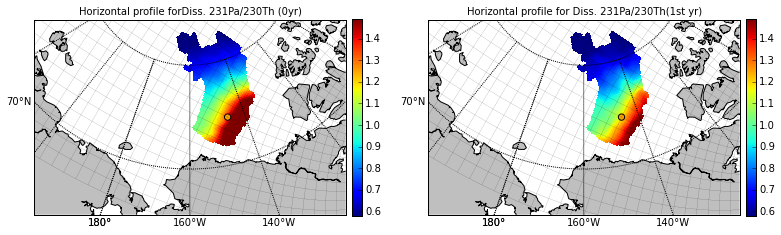

In [12]:
a1=640-400
a2=800-400
b1=0
b2=300
layer=44

data1=readdata('diss','Pa',layer,a1,a2,b1,b2)
data2=readdata('diss','Th',layer,a1,a2,b1,b2)

data=data1[:,:,:]/data2[:,:,:]

vmax=0.7*(data1[:,:,:]/data2[:,:,:]).max()
vmin=1.2*(data1[:,:,:]/data2[:,:,:]).min()

plot_ratio('Diss','231Pa/230Th',data)

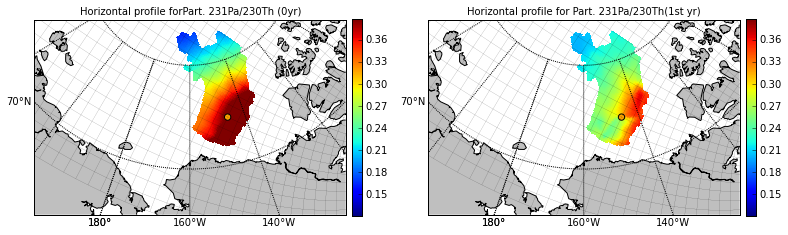

In [14]:
data1=readdata('part','Pa',layer,a1,a2,b1,b2)
data2=readdata('part','Th',layer,a1,a2,b1,b2)

vmax=0.7*(data1[:,:,:]/data2[:,:,:]).max()
vmin=1.2*(data1[:,:,:]/data2[:,:,:]).min()

data=data1[:,:,:]/data2[:,:,:]

plot_ratio('Part','231Pa/230Th',data)

### Focus on one tracer at one time

Note that these results are not yearly average. They are the monthly average from Dec in each year.

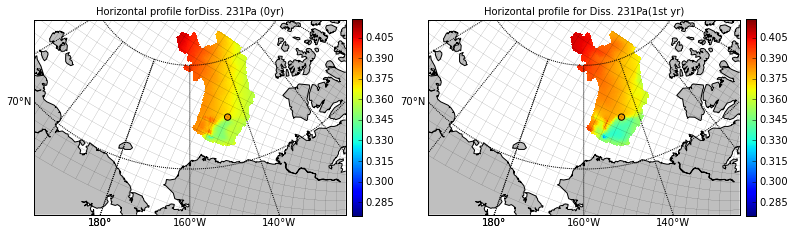

In [15]:
data=readdata('diss','Pa',layer,a1,a2,b1,b2)

vmax=1*(data[:,:,:]).max()
vmin=1.5*(data[:,:,:]).min()+0.275

plot_ratio('Diss','231Pa',data)

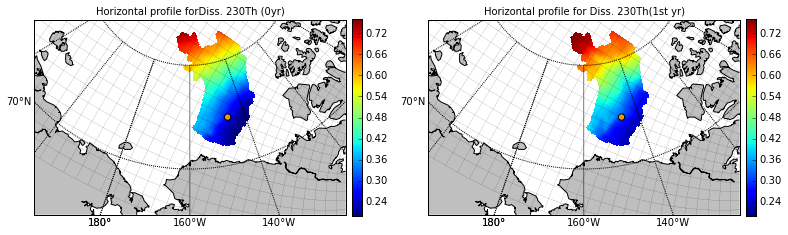

In [16]:
data=readdata('diss','Th',layer,a1,a2,b1,b2)

vmax=1*(data[:,:,:]).max()
vmin=1.5*(data[:,:,:]).min()+0.2

plot_ratio('Diss','230Th',data)

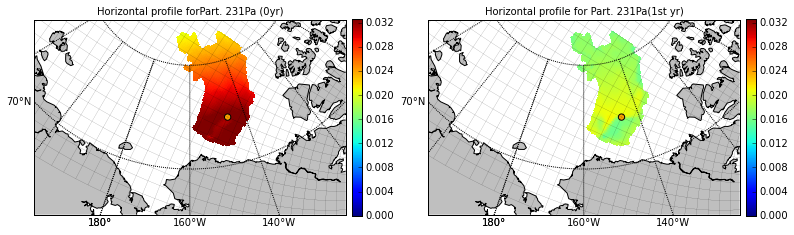

In [17]:
data=readdata('part','Pa',layer,a1,a2,b1,b2)

vmax=0.9*(data[:,:,:]).max()
vmin=1.5*(data[:,:,:]).min()

plot_ratio('Part','231Pa',data)

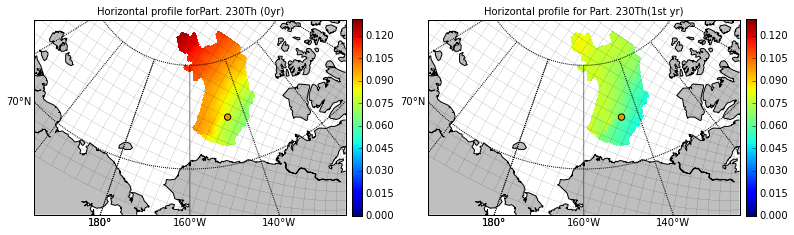

In [18]:
data=readdata('part','Th',layer,a1,a2,b1,b2)

vmax=1*(data[:,:,:]).max()
vmin=1.5*(data[:,:,:]).min()

plot_ratio('Part','230Th',data)

### Focus on the time evolution

In [23]:
def readdata(phase,string,i,x,y):
    if string =='Pa':
        if phase =='diss':
            data=ptrc.variables['TR_7'][:,i,x,y]
        else:
            data=ptrc.variables['TR_9'][:,i,x,y]
    else:
        if phase =='diss':
            data=ptrc.variables['TR_8'][:,i,x,y]
        else:
            data=ptrc.variables['TR_10'][:,i,x,y]
    data=np.ma.masked_where(data<=0,data)
    return data

def tracer_evolution(ptrc,j,string,name):
    

    
    fig = plt.figure(figsize=(20,10))
    gs = gridspec.GridSpec(3, 3)
    ax = fig.add_subplot(gs[0:2,0])
    m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
    m.drawcoastlines()
    m.fillcontinents(color = '0.75')
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
    x_lon,y_lat = m(lon,lat)
    plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
    #x=[700,630,600]
    #y=[200,300,350]
    #c=['orange','red','cyan']
    m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=40)
    m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
    plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')

    ax1 = fig.add_subplot(gs[0,1])
    i=j[0]
    for loc in range (len(x)):
        data=readdata('diss',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[0],dep[i]))
    #plt.legend(loc=0,fontsize=11)
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')


    ax = fig.add_subplot(gs[0,2])      
    for loc in range (len(x)):
        data=readdata('part',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[1],dep[i]))
    #plt.legend(loc=0,fontsize=11)
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')


    ax = fig.add_subplot(gs[1,1])
    i=j[1]
    for loc in range (len(x)):
        data=readdata('diss',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[0],dep[i]))
    #plt.legend(loc=0,fontsize=11)
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')

    ax = fig.add_subplot(gs[1,2])
    for loc in range (len(x)):
        data=readdata('part',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[1],dep[i]))
    #plt.legend(loc=0,fontsize=11)
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')

    ax = fig.add_subplot(gs[2,1])
    i=j[2]
    for loc in range (len(x)):
        data=readdata('diss',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[0],dep[i])))
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[0],dep[i]))
    #plt.legend(loc=0,fontsize=11)
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')

    ax = fig.add_subplot(gs[2,2])
    for loc in range (len(x)):
        data=readdata('part',string,i,x[loc],y[loc])
        plt.plot(data,color=c[loc],linestyle='-',label=('%s,depth: %sm'%(name[1],dep[i])))
    plt.xlabel('Time step (month)')
    plt.ylabel('Tracer concentration (dpm/m$^{3}$)')
    plt.title('%s (%sm)'%(name[1],dep[i]))
    plt.axvline(x=11,ls=':')
    plt.axvline(x=23,ls=':')
    #plt.axvline(x=35,ls=':')
    #plt.axvline(x=47,ls=':')
    #plt.legend(loc=0,fontsize=11)
    plt.show()

# 2002EXH003 *2

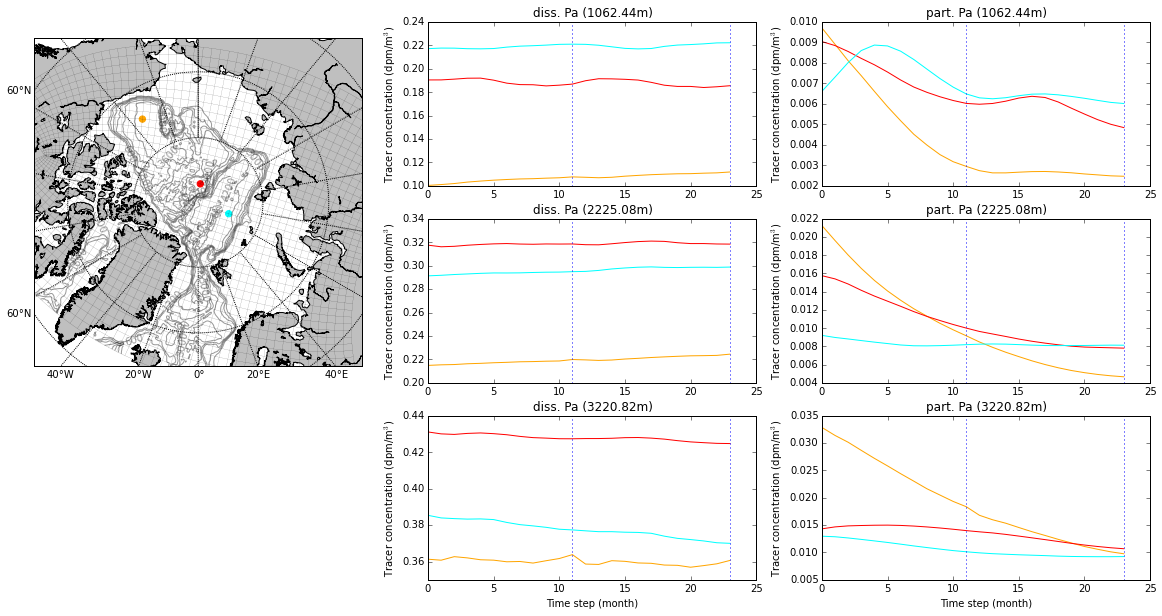

In [24]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]


from matplotlib import gridspec
x=[700-400,630-400,600-400]
y=[200,300,350]
c=['orange','red','cyan']
ptrc=nc.Dataset(nc_filename[0])
tracer_evolution(ptrc,j=[35,40,43],string='Pa',name=['diss. Pa','part. Pa'])

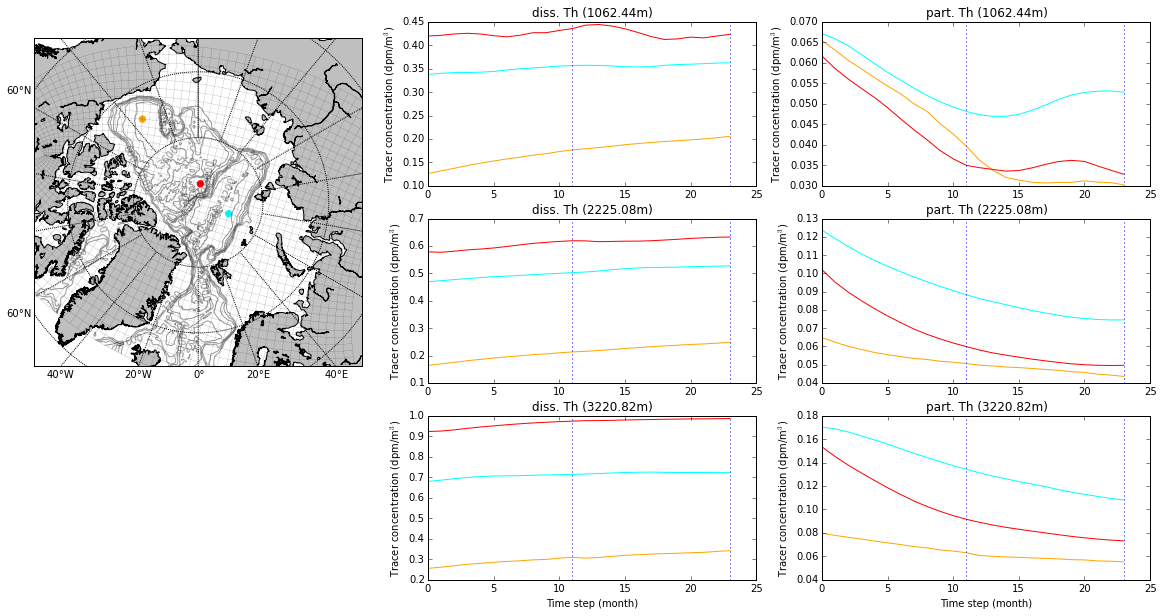

In [25]:
ptrc=nc.Dataset(nc_filename[0])
tracer_evolution(ptrc,j=[35,40,43],string='Th',name=['diss. Th','part. Th'])

### Take a look at the vertical profiles of scavenging parameters

In [26]:
#nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*ptrc*.nc'))
#print("found *.nc file: \n{}".format(nc_filename))

ptrc=nc.Dataset(nc_filename[0])
dep=ptrc.variables['deptht'][:]
lon=ptrc.variables['nav_lon'][:]
lat=ptrc.variables['nav_lat'][:]

TR_7=ptrc.variables['TR_7'][-1,:,:,:]
TR_8=ptrc.variables['TR_8'][-1,:,:,:]
TR_9=ptrc.variables['TR_9'][-1,:,:,:]
TR_10=ptrc.variables['TR_10'][-1,:,:,:]
TR_11=ptrc.variables['TR_11'][-1,:,:,:]
TR_12=ptrc.variables['TR_12'][-1,:,:,:]

TR_8=np.ma.masked_where(TR_7<= 0, TR_8)
TR_9=np.ma.masked_where(TR_7<= 0, TR_9)
TR_10=np.ma.masked_where(TR_7<= 0, TR_10)
TR_11=np.ma.masked_where(TR_7<= 0, TR_11)
TR_12=np.ma.masked_where(TR_7<= 0, TR_12)
#finally  masked TR7
TR_7=np.ma.masked_where(TR_7<= 0, TR_7)

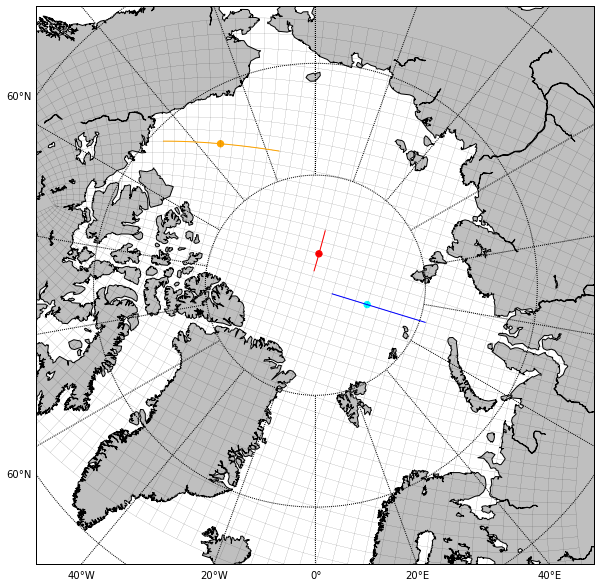

In [28]:
fig = plt.figure(figsize=(10,10))
#gs = gridspec.GridSpec(3, 3)
ax = fig.add_subplot()
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75')
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1])
x_lon,y_lat = m(lon,lat)
plt.plot(x_lon[::10,::10],y_lat[::10,::10],x_lon.T[::10,::10],y_lat.T[::10,::10],color='k',linewidth=0.1)
x=[700-400,630-400,600-400]
y=[200,300,350]
c=['orange','red','cyan']
m.scatter(x_lon[x,y],y_lat[x,y],color=c,s=40)
m.plot(x_lon[700-400,150:250],y_lat[700-400,150:250],color='orange')
m.plot(x_lon[615-400:650-400,300],y_lat[615-400:650-400,300],color='red')
m.plot(x_lon[600-400,320:400],y_lat[600-400,320:400],color='blue')
#m = m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.4)
#plt.clabel(m, fontsize=10, inline=1,fmt = '%1.0f')
plt.show()

In [29]:
def verticalplot(lat,data1, title1,data2,title2,lmin=30,lmax=46,ylim=[0,4000]):
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,2,1)
    plt.contourf(lat[:],dep[lmin:lmax],data1[lmin:lmax,:],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lat')
    plt.title('%s'%title1)
    plt.axhline(y=1062,c="blue",linewidth=2,alpha=0.5)
    plt.axhline(y=2225,c="blue",linewidth=2,alpha=0.5)
    plt.axhline(y=3220,c="blue",linewidth=2,alpha=0.5)

    ax = fig.add_subplot(1,2,2)
    plt.contourf(lat[:],dep[lmin:lmax],data2[lmin:lmax,:],alpha=0.5)
    plt.colorbar()
    plt.ylim(ylim)
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Lat')
    plt.title('%s'%title2)
    plt.axhline(y=1062,c="blue",linewidth=2,alpha=0.5)
    plt.axhline(y=2225,c="blue",linewidth=2,alpha=0.5)
    plt.axhline(y=3220,c="blue",linewidth=2,alpha=0.5)

    plt.show()

# the second year of 2002

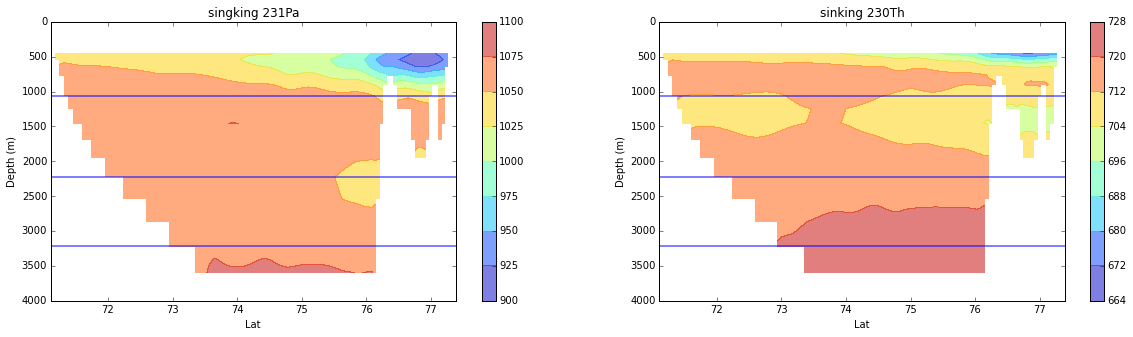

In [31]:
sPa=6.01*100*TR_11+500
sTh=2.26*100*TR_12+500

verticalplot(lat=lat[700-400,150:250],data1=sPa[:,700-400,150:250], title1='singking 231Pa',data2=sTh[:,700-400,150:250],title2='sinking 230Th')

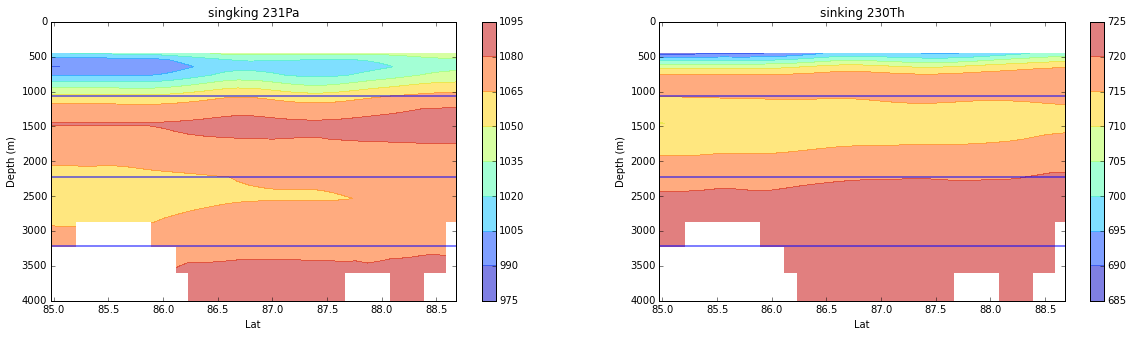

In [32]:
verticalplot(lat=lat[615-400:650-400,300],data1=sPa[:,615-400:650-400,300], title1='singking 231Pa',data2=sTh[:,615-400:650-400,300],title2='sinking 230Th')

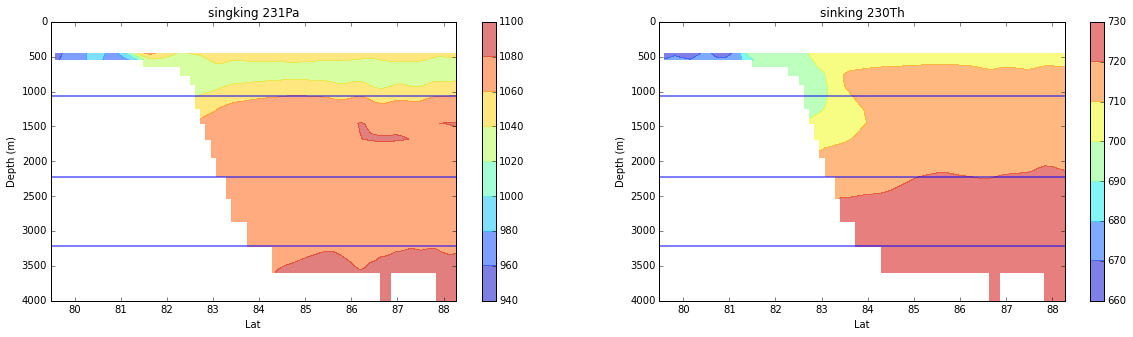

In [33]:
verticalplot(lat=lat[600-400,320:400],data1=sPa[:,600-400,320:400], title1='singking 231Pa',data2=sTh[:,600-400,320:400],title2='sinking 230Th')